In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
with open("manipal_atmospherics_df.csv", "r") as f:
    for i in range(10):
        print(f.readline())

latitude,longitude,elevation,utc_offset_seconds,timezone,timezone_abbreviation

13.321617,74.79452,97.0,19800,Asia/Kolkata,GMT+5:30



time,temperature_2m_mean (Â°C),precipitation_sum (mm),shortwave_radiation_sum (MJ/mÂ²),apparent_temperature_mean (Â°C),wind_speed_10m_max (km/h),et0_fao_evapotranspiration (mm),sunshine_duration (s),wind_direction_10m_dominant (Â°),pressure_msl_mean (hPa),cloud_cover_mean (%),dew_point_2m_mean (Â°C),soil_moisture_0_to_7cm_mean (mÂ³/mÂ³)

2011-01-04,24.7,0.00,19.69,27.7,17.4,4.09,36798.94,325,1009.7,70,20.4,0.278

2011-01-05,25.4,0.00,17.77,28.5,15.9,3.91,36494.80,309,1008.7,85,20.4,0.276

2011-01-06,26.2,0.00,19.31,28.8,18.4,4.45,36924.74,319,1008.7,61,19.4,0.273

2011-01-07,25.6,0.00,20.26,28.0,15.6,4.52,37417.72,178,1008.6,12,18.6,0.270

2011-01-08,25.2,0.00,20.29,28.2,15.1,4.38,37473.21,313,1008.3,29,20.0,0.268

2011-01-09,25.2,0.00,20.82,28.4,18.3,4.49,37701.15,297,1008.0,52,20.0,0.266



In [6]:
df = pd.read_csv("manipal_atmospherics_df.csv",
    skiprows=3
)

In [7]:
df.isnull().sum()

time                                   0
temperature_2m_mean (°C)               0
precipitation_sum (mm)                 0
shortwave_radiation_sum (MJ/m²)        0
apparent_temperature_mean (°C)         0
wind_speed_10m_max (km/h)              0
et0_fao_evapotranspiration (mm)        0
sunshine_duration (s)                  0
wind_direction_10m_dominant (°)        0
pressure_msl_mean (hPa)                0
cloud_cover_mean (%)                   0
dew_point_2m_mean (°C)                 0
soil_moisture_0_to_7cm_mean (m³/m³)    0
dtype: int64

In [8]:
df["time"] = pd.to_datetime(df["time"])
df['time'].dtype

dtype('<M8[ns]')

In [9]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("(", "")
    .str.replace(")", "")
    .str.replace("°", "")
    .str.replace("²", "2")
    .str.replace("/", "_")
    .str.replace("³", "3")
)
df.columns

Index(['time', 'temperature_2m_mean_c', 'precipitation_sum_mm',
       'shortwave_radiation_sum_mj_m2', 'apparent_temperature_mean_c',
       'wind_speed_10m_max_km_h', 'et0_fao_evapotranspiration_mm',
       'sunshine_duration_s', 'wind_direction_10m_dominant_',
       'pressure_msl_mean_hpa', 'cloud_cover_mean_%', 'dew_point_2m_mean_c',
       'soil_moisture_0_to_7cm_mean_m3_m3'],
      dtype='object')

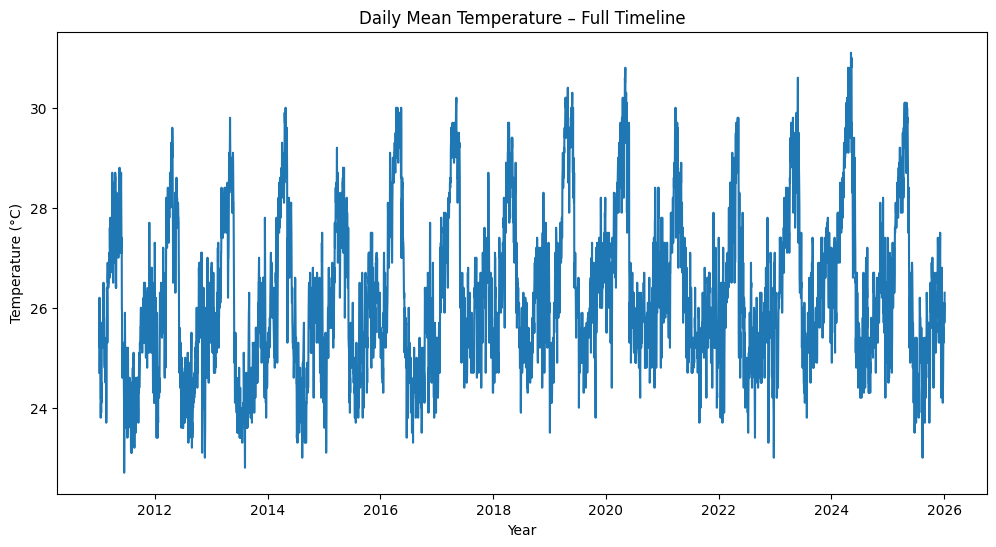

In [25]:
plt.figure(figsize=(12,6))
plt.plot(df["time"], df["temperature_2m_mean_c"])
plt.title("Daily Mean Temperature – Full Timeline")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.show()


In [ ]:
df["doy"] = df["time"].dt.dayofyear
mean_temp_doy = df.groupby("doy")["temperature_2m_mean_c"].mean()
mean_precip_doy = df.groupby("doy")["precipitation_sum_mm"].mean()
month_starts = df.groupby(df["time"].dt.month)["doy"].min()

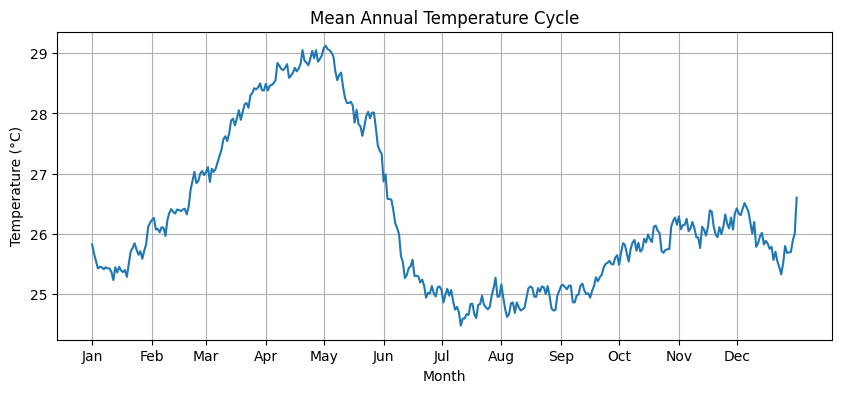

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(mean_temp_doy.index, mean_temp_doy.values)
plt.xticks(month_starts.values, 
           ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Mean Annual Temperature Cycle")
plt.grid(True)
plt.show()

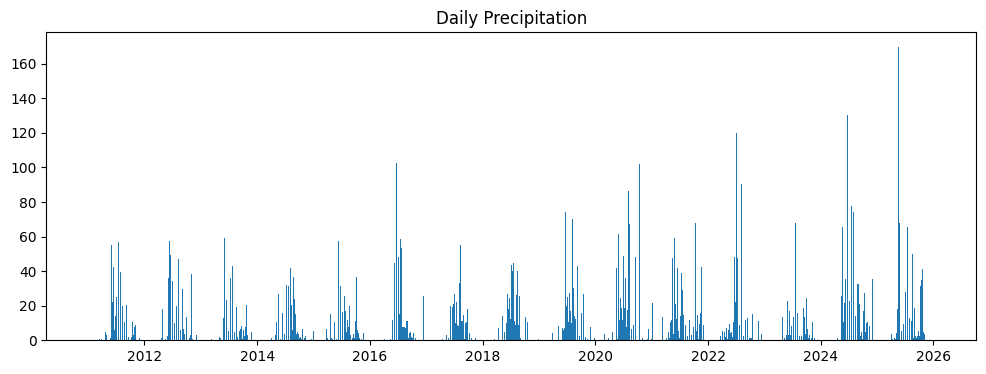

In [12]:
plt.figure(figsize=(12,4))
plt.bar(df["time"], df["precipitation_sum_mm"])
plt.title("Daily Precipitation")
plt.show()


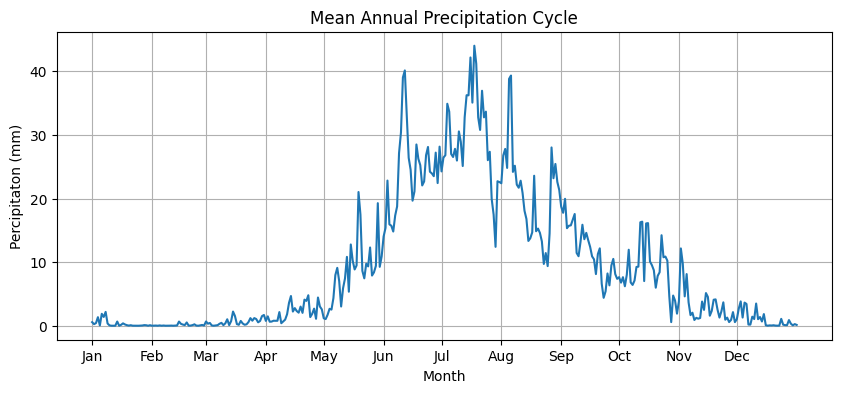

In [21]:
plt.figure(figsize=(10,4))
plt.plot(mean_precip_doy.index, mean_precip_doy.values)
plt.xticks(month_starts.values, 
           ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.xlabel("Month")
plt.ylabel("Percipitaton (mm)")
plt.title("Mean Annual Precipitation Cycle")
plt.grid(True)
plt.show()



In [13]:
df['year'] = df['time'].dt.year
yearly_avg_temp = df.groupby('year')['temperature_2m_mean_c'].mean()
yearly_total_precip = df.groupby('year')['precipitation_sum_mm'].sum()

In [14]:
yearly_avg_temp

year
2011    25.613812
2012    25.715574
2013    25.700548
2014    26.057808
2015    26.045753
2016    26.055738
2017    26.647397
2018    26.433699
2019    26.730959
2020    26.842623
2021    26.295890
2022    26.022466
2023    26.772329
2024    26.783060
2025    26.280274
2026    25.950000
Name: temperature_2m_mean_c, dtype: float64

In [15]:
from sklearn.linear_model import LinearRegression

X = np.array(yearly_avg_temp.index).reshape(-1,1)  # years

y_temp = yearly_avg_temp.values
lr_temp = LinearRegression()
lr_temp.fit(X, y_temp)
temp_slope = lr_temp.coef_[0]

y_precip = yearly_total_precip.values
lr_precip = LinearRegression()
lr_precip.fit(X, y_precip)
precip_slope = lr_precip.coef_[0]

print(f"Temperature trend: {temp_slope:.3f} °C per year")
print(f"Precipitation trend: {precip_slope:.3f} mm per year")

Temperature trend: 0.048 °C per year
Precipitation trend: 12.505 mm per year


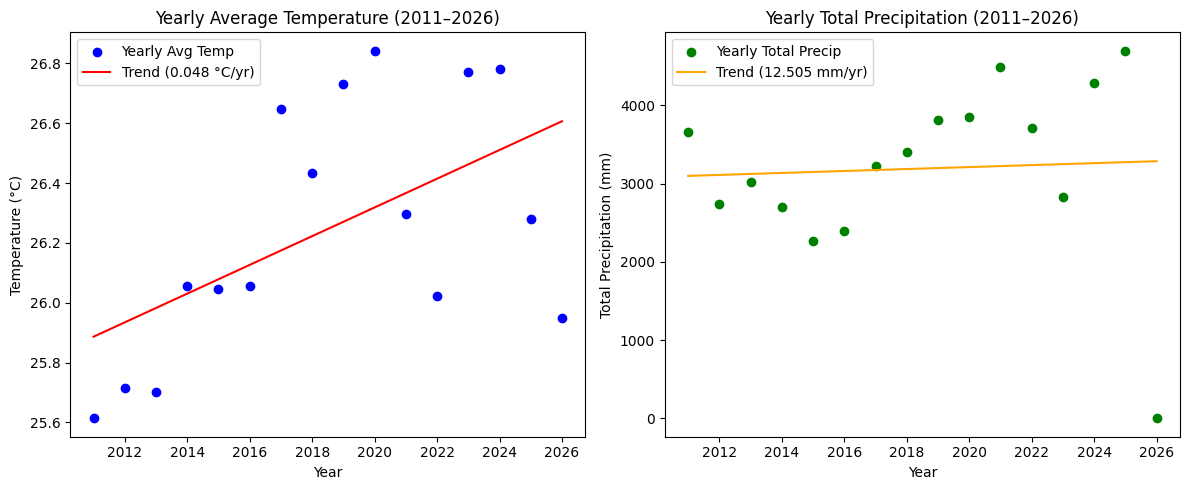

In [16]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(yearly_avg_temp.index, yearly_avg_temp.values, color='blue', label='Yearly Avg Temp')
plt.plot(yearly_avg_temp.index, lr_temp.predict(X), color='red', label=f'Trend ({temp_slope:.3f} °C/yr)')
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Yearly Average Temperature (2011–2026)")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(yearly_total_precip.index, yearly_total_precip.values, color='green', label='Yearly Total Precip')
plt.plot(yearly_total_precip.index, lr_precip.predict(X), color='orange', label=f'Trend ({precip_slope:.3f} mm/yr)')
plt.xlabel("Year")
plt.ylabel("Total Precipitation (mm)")
plt.title("Yearly Total Precipitation (2011–2026)")
plt.legend()

plt.tight_layout()
plt.show()